# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [7]:
arquivo=pd.read_csv('df_scikitlearn.csv')

In [8]:
arquivo.columns

Index(['Unnamed: 0', 'sexo_masculino', 'veiculo_yes', 'imovel_yes',
       'renda_comercial_associate', 'renda_pensioner', 'renda_state_servant',
       'renda_student', 'renda_working', 'educ_academic_degree',
       'educ_higher_education', 'educ_incomplete_higher',
       'educ_lower_secondary', 'educ_secondary', 'estciv_civil_marriage',
       'estciv_married', 'estciv_separated', 'estciv_single', 'estciv_widow',
       'resid_co-op_apartment', 'resid_house_apartment',
       'resid_municipal_apartment', 'resid_office_apartment',
       'resid_rented_apartment', 'resid_with_parents', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [9]:
arquivo=arquivo[['sexo_masculino', 'veiculo_yes', 'imovel_yes',
       'renda_comercial_associate', 'renda_pensioner', 'renda_state_servant',
       'renda_student', 'renda_working', 'educ_academic_degree',
       'educ_higher_education', 'educ_incomplete_higher',
       'educ_lower_secondary', 'educ_secondary', 'estciv_civil_marriage',
       'estciv_married', 'estciv_separated', 'estciv_single', 'estciv_widow',
       'resid_co-op_apartment', 'resid_house_apartment',
       'resid_municipal_apartment', 'resid_office_apartment',
       'resid_rented_apartment', 'resid_with_parents', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau']]

In [10]:
arquivo.isna().sum()

sexo_masculino               0
veiculo_yes                  0
imovel_yes                   0
renda_comercial_associate    0
renda_pensioner              0
renda_state_servant          0
renda_student                0
renda_working                0
educ_academic_degree         0
educ_higher_education        0
educ_incomplete_higher       0
educ_lower_secondary         0
educ_secondary               0
estciv_civil_marriage        0
estciv_married               0
estciv_separated             0
estciv_single                0
estciv_widow                 0
resid_co-op_apartment        0
resid_house_apartment        0
resid_municipal_apartment    0
resid_office_apartment       0
resid_rented_apartment       0
resid_with_parents           0
idade                        0
tempo_emprego                0
possui_celular               0
possui_fone_comercial        0
possui_fone                  0
possui_email                 0
qt_pessoas_residencia        0
mau                          0
dtype: i

In [11]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sexo_masculino             16650 non-null  int64  
 1   veiculo_yes                16650 non-null  int64  
 2   imovel_yes                 16650 non-null  int64  
 3   renda_comercial_associate  16650 non-null  int64  
 4   renda_pensioner            16650 non-null  int64  
 5   renda_state_servant        16650 non-null  int64  
 6   renda_student              16650 non-null  int64  
 7   renda_working              16650 non-null  int64  
 8   educ_academic_degree       16650 non-null  int64  
 9   educ_higher_education      16650 non-null  int64  
 10  educ_incomplete_higher     16650 non-null  int64  
 11  educ_lower_secondary       16650 non-null  int64  
 12  educ_secondary             16650 non-null  int64  
 13  estciv_civil_marriage      16650 non-null  int

In [12]:
y = arquivo.mau
X = arquivo.drop('mau', axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) 
# separação 70% da base para treinamento e 30% para teste

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [14]:
clf = DecisionTreeClassifier(random_state=100)
clf_train = clf.fit(X_train,y_train)

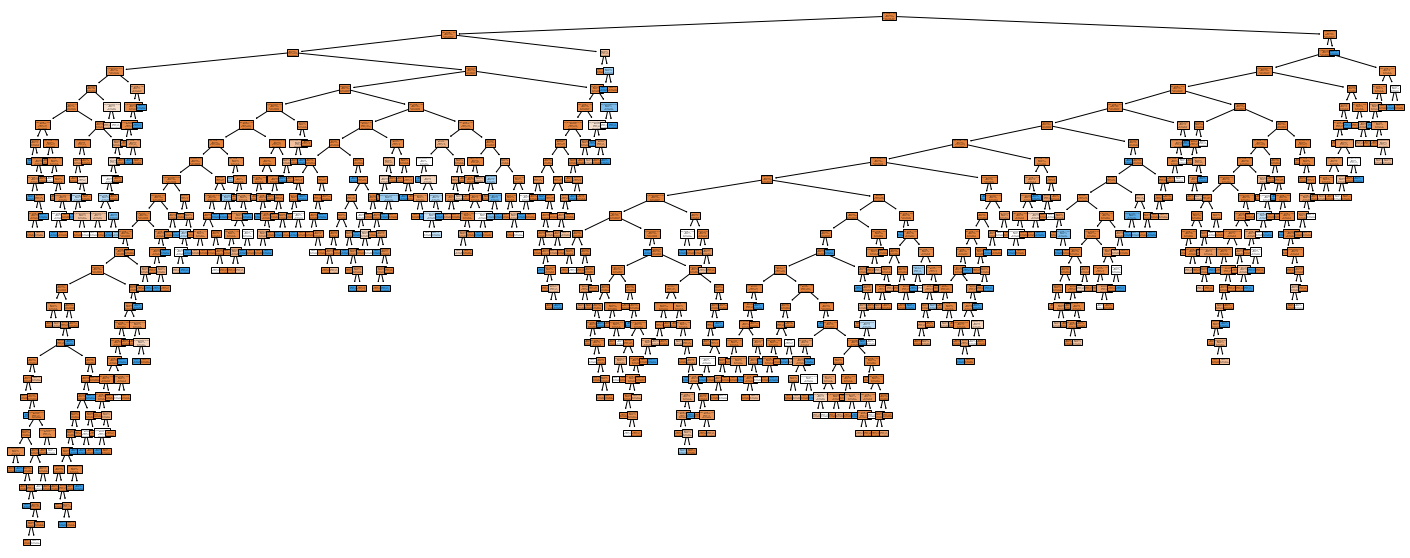

In [15]:
plt.figure(figsize=(25, 10))
plot_tree(clf_train,
          filled=True,
          class_names=['aprovado', 'reprovado'],
          feature_names=X.columns);

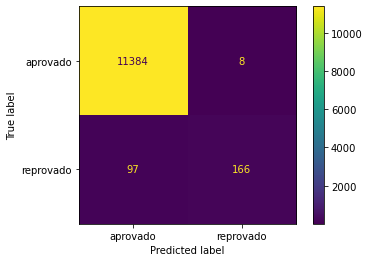

In [45]:
plot_confusion_matrix(clf_train, X_train, y_train, display_labels=['aprovado', 'reprovado']);

In [17]:
#cálculo da acurácia
X_train.shape

(11655, 31)

In [18]:
11384+8+97+166

11655

In [19]:
(11384+166)/11655 # valor da acurácia desta árvore de decisão de treinamento sem poda

0.990990990990991

In [20]:
# outra forma de se calcular a acurácia de treinamento
y_chapeu_train = clf.predict(X_train)
y_chapeu_train

array([False, False, False, ..., False, False, False])

In [21]:
accuracy_score(y_train, y_chapeu_train)

0.990990990990991

In [22]:
# diante da extenção da árvore de decisão, faz-se necessário a realização de poda para se evitar o overfitting.
# para tanto, será necessário primeiro localizar o ponto alpha do conjunto de dados de treino e teste

clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [23]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

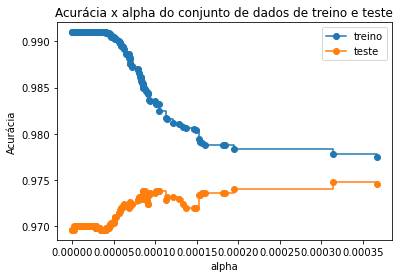

In [24]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [25]:
pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score': test_scores})

,alpha,score
0,0.000000,0.969570
1,0.000000,0.969570
2,0.000002,0.969570
3,0.000002,0.969970
4,0.000004,0.969970
...,...,...
145,0.000181,0.973574
146,0.000184,0.973574
147,0.000195,0.973974
148,0.000315,0.974775


In [26]:
clf_podada = DecisionTreeClassifier(random_state=100, ccp_alpha=0.00015)

0.9719719719719719

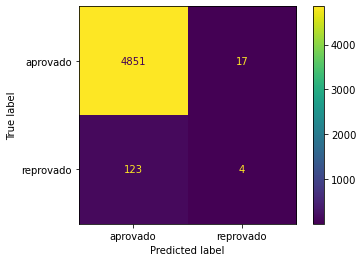

In [48]:
clf_podada.fit(X_train, y_train)
predict = clf_podada.predict(X_test)
plot_confusion_matrix(clf_podada, X_test, y_test, display_labels=['aprovado', 'reprovado']);
accuracy_score(y_test, predict)

In [28]:
pred = clf_podada.predict(X_test)

In [29]:
accuracy_score(y_test, pred)

0.9719719719719719

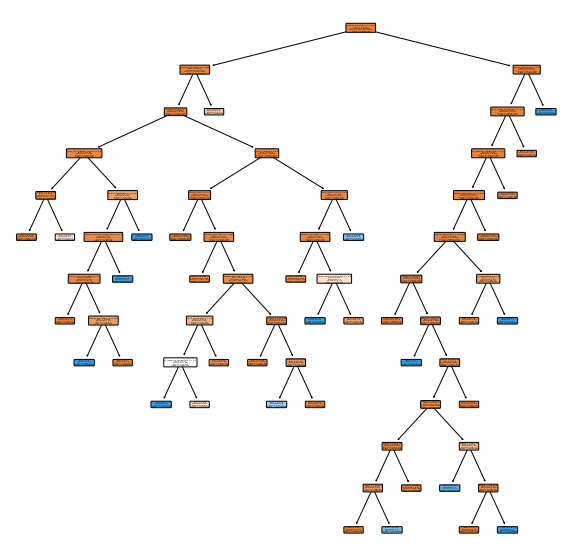

In [30]:
plt.figure(figsize=[10,10])
plot_tree(clf_podada,
         filled=True,
         rounded=True,
         class_names=['aprovado', 'reprovado'],
         feature_names=X_train.columns);

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [50]:
clf = DecisionTreeClassifier(random_state=100)
clf_test= clf.fit(X_test,y_test)

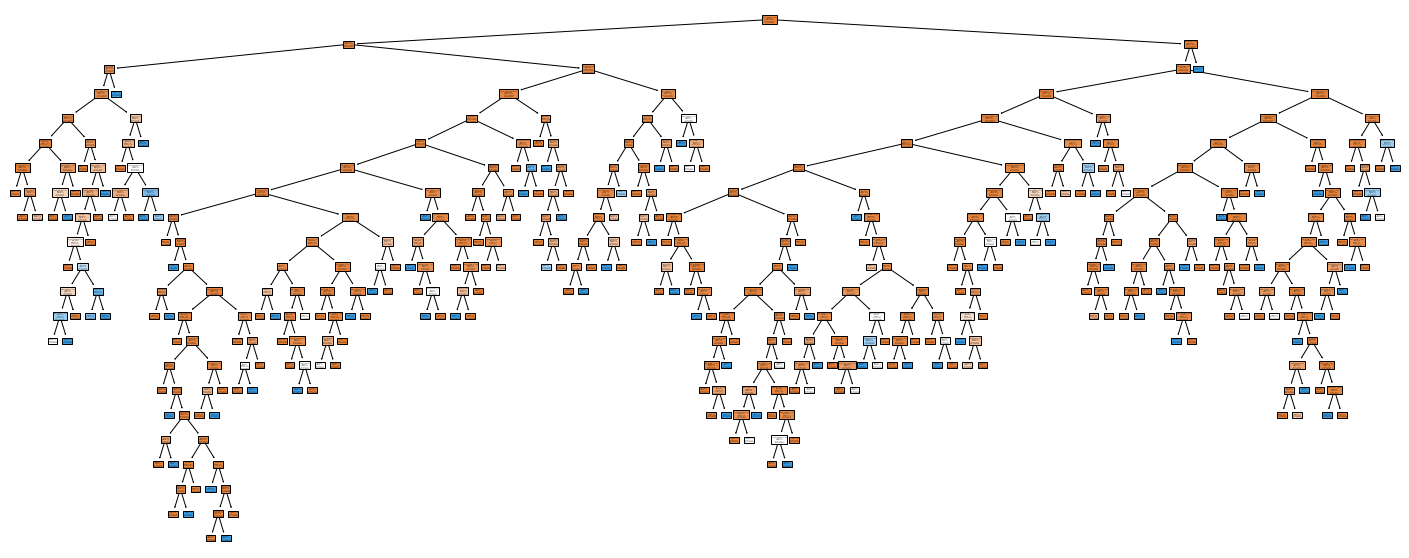

In [51]:
plt.figure(figsize=(25, 10))
plot_tree(clf_test,
          filled=True,
          class_names=['aprovado', 'reprovado'],
          feature_names=X.columns);

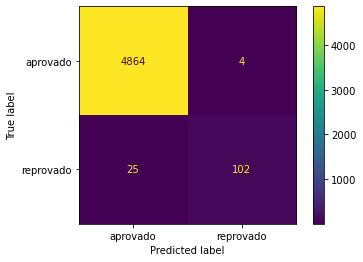

In [52]:
plot_confusion_matrix(clf_test, X_test, y_test, display_labels=['aprovado', 'reprovado']);

In [34]:
y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste

array([False, False, False, ..., False, False, False])

In [35]:
X_test.shape

(4995, 31)

In [37]:
4864+102+25+4

4995

In [38]:
(4864+102)/4995
#acurácia

0.9941941941941942

In [42]:
accuracy_score(y_test, y_chapeu_teste)
# outra forma de calcular a acurácia

0.9941941941941942

In [53]:
# Note-se que a acurácia da base treino é de 0.990990990990991, enquanto que a acarácia da base teste é de
# 0.9941941941941942. Ou seja, existe uma pequena diferença de acurácia entre a base de treino e a base de teste. 
# Já em relação a acurária da base treino podada,correspondente a 0.9719719719719719, esta diferença é maior,
# o que demonstra maior índice de erro nos dados preditos.

In [58]:
# agora vamos treinar uma nova árvore com número mínimo de observações por folha de 5 e 
# máximo de profundidade de 10. 

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9743743743743744

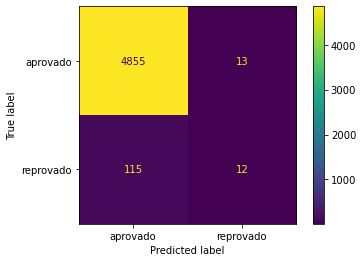

In [55]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovado', 'reprovado']);

In [57]:
(115+13)/(4855+12+13+115) # proporção de proponentes foram classificados como 'maus'

0.025625625625625627

In [59]:
0.9743743743743744 + 0.025625625625625627 # soma da acurácia e a proporção de classificação errada

1.0

Verica-se na matrix de confusão acima, que os casos de acertos correspondem a 4.867 (4.855 + 12), enquanto que os casos de erros na predição corresponde à 128 (115 + 13). Note-se, ainda, que a proporção dos dados preditos classificados como 'maus', ou seja, aqueles em que a árvore de decisão classificou erroneamento os dados preditos em relação aos dados reais, é de 2,5625% (0.025625625625625627)

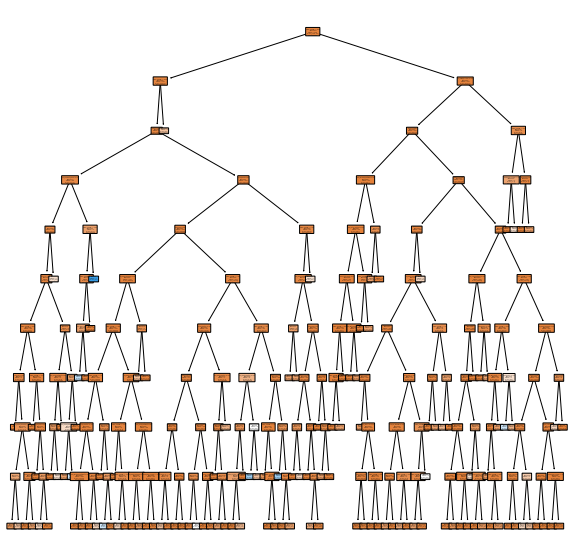

In [56]:
plt.figure(figsize=[10,10])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['aprovado', 'reprovado'],
         feature_names=X_train.columns);

Se todos os contratos fossem classificados como 'bons', a acurácia seria praticamente igual a 1 (um), visto que não haveria chance de erro na classificação a ser realizada pela árvore de decisão. 